# Projeto 2 - Ciência dos Dados

#### Integrantes: Bruna Lima Meinberg, Lucas Novais de Oliveira, Mariana Araújo de Albuquerque

_______

## Sobre o Projeto:
Durante o curso de Ciência dos Dados, além de aprimorar os conhecimentos em relação a programação, aprimoramos também as habilidades de analisar determinadas informações e aprender como essas informações colaboram com a previsão de diferentes acontecimentos.
Como principal desse projeto, tivemos que escolher um tema de interesse e, sobre esse tema, encontrar algo que desejamos prever.

As informações se encaixam em:
- Aquilo que desejamos prever:
  - Variável principal - Target (Variável resposta ou dependente)
- Aquilo que usamos para prever:
  - Demais variáveis- Features (Variáveis explicativas ou independentes)

## Sobre o Tema:


<img src= '../imagens/brasileirao.jpeg'>

### Campeonato Brasileiro
O Campeonato Brasileiro, também conhecido como brasileirão, é a prinipal competição de futebol do Brasil e é considerada uma das ligas mais fortes do mundo. A competicão conta com a participação de vinte clubes e, durante a nove meses do ano, cada clube joga duas vezes contra os outros, uma vez como mandante (em sua casa) e outra como visitante (na casa do adversário), com um sistema de pontos corridos. Em caso de vitória, a equipe ganha 3 pontos, em caso de empate, a equipe ganha um ponto e em caso de derrota, nenhum ponto.

Com o tema escolhido, decidimos tentar prever se, em um confronto entre dois times, qual seria vencedor dependendo do numero de vitórias, derrotas e empates dos times.

_______

## Início do Projeto:


Carregando bibliotecas utilizadas:

In [192]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import os
import nltk 
from nltk.stem import RSLPStemmer
nltk.download('stopwords')
import seaborn as sns
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, probplot
import statsmodels.api as sm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import re 
import sweetviz as sv
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

[nltk_data] Downloading package stopwords to /Users/bruna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Localização do diretório:

In [193]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/bruna/Desktop/2022.1/CDADOS/Projeto 2/22-1a-cd-p2-projeto2_brunam_lucaso_marianaa


Leitura dos Dataframe:

In [194]:
df3 = 'full.xls'


In [195]:

tudo = pd.read_excel(df3)


### Funções utilizadas:

In [196]:

def cleanup(text):
    
    #import string
    punctuation = '[!-.:?;%)(\",_]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed.lower()



def checa_vitoria(lista, df, df2):

    for time in lista:

        vitoria=0
        derrota=0
        empate=0
        vitoria_mandante=0
        vitoria_visitante=0
        derrota_mandante=0
        derrota_visitante=0
        empate_mandante=0
        empate_visitante=0
        
        for i in range(6125, (len(df)+6125)):
            
            if df['mandante'][i] == time:

                if df['vencedor'][i]==1:
                    vitoria+=1
                    vitoria_mandante+=1
                
                if df['vencedor'][i]==2:
                    derrota+=1
                    derrota_mandante+=1
                    
                if df['vencedor'][i]==0:
                    empate+=1
                    empate_mandante+=1
            
            if df['visitante'][i]==time:
                
                if df['vencedor'][i]==1:
                    derrota+=1
                    derrota_visitante+=1
                
                if df['vencedor'][i]==2:
                    vitoria+=1
                    vitoria_visitante+=1
                    
                if df['vencedor'][i]==0:
                    empate+=1
                    empate_visitante+=1

        df2.loc[df2['time']== time, 'vitórias'] = vitoria
        df2.loc[df2['time']== time, 'derrotas'] = derrota
        df2.loc[df2['time']== time, 'empate'] = empate
        df2.loc[df2['time']== time, 'vitórias_mandante'] = vitoria_mandante
        df2.loc[df2['time']== time, 'vitórias_visitante'] = vitoria_visitante
        df2.loc[df2['time']== time, 'derrotas_mandante'] = derrota_mandante
        df2.loc[df2['time']== time, 'derrotas_visitante'] = derrota_visitante
        df2.loc[df2['time']== time, 'empates_mandante'] = empate_mandante
        df2.loc[df2['time']== time, 'empates_visitante'] = empate_visitante


        
    return df2



def vencedor_troca(df):
    if df['mandante_placar'] > df['visitante_placar']:
        return 1
    elif df['mandante_placar'] < df['visitante_placar']:
        return 2
    else:
        return 0
    
    
def ajusta_df_confrontos(df, lista_times):
    
    dic4 = {'mandante':[],
            'visitante':[],
            'total de jogos':[],
            'vitorias_mandante':[],
            'empates':[],
            'derrotas_mandante':[]
            }
    
    for time in lista_times:

        for time2 in lista_times:

            vitoiras_mandante = 0
            derrotas_mandante = 0
            empates = 0


            if time != time2:

                df1 = df.loc[confrontos['mandante']==time,:]
                df2 = a.loc[a['visitante']==time2]

                if len(df2)>0:

                    for i in range(0, len(df2)):

                        if df2.iloc[i,4]==0:
                            empates+=1
                        if df2.iloc[i,4]==1:
                            vitoiras_mandante+=1
                        if df2.iloc[i,4]==2:
                            derrotas_mandante+=1
                    
                    

                dic4['total de jogos'].append(len(df2))
                dic4['mandante'].append(time)
                dic4['visitante'].append(time2)
                dic4['vitorias_mandante'].append(vitoiras_mandante)
                dic4['derrotas_mandante'].append(derrotas_mandante)
                dic4['empates'].append(empates)


    df_final = pd.DataFrame(dic4)
    return df_final


def retorna_df_final(df, df2):
    
    lista = df2['time'].tolist()
    
    for i in range(6125, 6125+len(df)):
        
        for time in lista:
            
            if df['mandante'][i] == time:
                
                index_list = df2.index[df2['time'] == time].tolist()
                index = index_list[0]
                df['vitorias_do_M_como_M'][i] = df2['vitórias_mandante'][index]
                df['empates_do_M_como_M'][i] = df2['empates_mandante'][index]
                df['derrotas_do_M_como_M'][i] = df2['derrotas_mandante'][index]
                
            if df['visitante'][i] == time:
                
                index_list = df2.index[df2['time'] == time].tolist()
                index = index_list[0]
                df['vitorias_do_V_como_V'][i] = df2['vitórias_visitante'][index]
                df['empates_do_V_como_V'][i] = df2['empates_visitante'][index]
                df['derrotas_do_V_como_V'][i] = df2['derrotas_visitante'][index]
                
    return df
    

### Arrumando os Dataframes:
Visto que os dados utilizados devem ser a partir de 2018, é necessário tirar uma parcela do dataframe

In [197]:
tudo = tudo[tudo.ID>6125]
tudo.head(10)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
6125,6126,1,2018-04-14,16:00:00,Sabado,Cruzeiro,Gremio,4-2-3-1,4-2-3-1,Renato Ga√∫cho,Renato Ga√∫cho,Gremio,mineirao,0,1,MG,RS,RS
6126,6127,1,2018-04-14,19:02:00,Sabado,Vitoria,Flamengo,4-2-3-1,4-1-4-1,M. Nogueira Barbieri,M. Nogueira Barbieri,-,barradao,2,2,BA,RJ,-
6127,6128,1,2018-04-14,21:03:00,Sabado,Santos,Ceara,2003-03-04 00:00:00,4-1-4-1,M. Oliveira Chamusca,M. Oliveira Chamusca,Santos,estadio municipal paulo machado de carvalho,2,0,SP,CE,SP
6128,6129,1,2018-04-15,11:00:00,Domingo,America-MG,Sport,4-1-4-1,4-3-2-1,N. Baptista J√∫nior,N. Baptista J√∫nior,America-MG,estadio raimundo sampaio,3,0,MG,PE,MG
6129,6130,1,2018-04-15,16:01:00,Domingo,Vasco,Atletico-MG,4-1-4-1,4-1-4-1,T. Mendes Larghi,T. Mendes Larghi,Vasco,estadio vasco da gama,2,1,RJ,MG,RJ
6130,6131,1,2018-04-15,16:02:00,Domingo,Internacional,Bahia,4-2-3-1,4-2-3-1,A. Ferreira,A. Ferreira,Internacional,estadio jose pinheiro borda,2,0,RS,BA,RS
6131,6132,1,2018-04-15,16:02:00,Domingo,Corinthians,Fluminense,4-2-4-0,2001-04-05 00:00:00,A. da Silva Braga,A. da Silva Braga,Corinthians,neo quimica arena,2,1,SP,RJ,SP
6132,6133,1,2018-04-15,19:01:00,Domingo,Athletico-PR,Chapecoense,3-4-2-1,2001-04-05 00:00:00,G. Kleina,G. Kleina,Athletico-PR,estadio joaquim americo guimaraes,5,1,PR,SC,PR
6133,6134,1,2018-04-16,19:59:00,Segunda-feira,Sao Paulo,Parana,4-2-3-1,4-1-4-1,Ademir Fesan,Ademir Fesan,Sao Paulo,morumbi,1,0,SP,PR,SP
6134,6135,1,2018-04-16,20:00:00,Segunda-feira,Botafogo-RJ,Palmeiras,4-1-4-1,4-2-3-1,R. Machado Marques,R. Machado Marques,-,estadio nilton santos,1,1,RJ,SP,-


In [198]:

tudo.fillna('', inplace=True)


In [199]:

tudo["dia"]=tudo["dia"].apply(cleanup)
tudo["mandante"]=tudo["mandante"].apply(cleanup)
tudo["visitante"]=tudo["visitante"].apply(cleanup)
tudo["tecnico_mandante"]=tudo["tecnico_mandante"].apply(cleanup)
tudo["tecnico_visitante"]=tudo["tecnico_visitante"].apply(cleanup)
tudo["vencedor"]=tudo["vencedor"].apply(cleanup)

In [200]:
dataframe=tudo.drop(labels=['data', 'hora', 'dia', 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante', 'arena'], axis=1)


### Dataframe utilizado:


In [201]:
dataframe

,ID,rodada,mandante,visitante,vencedor,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
6125,6126,1,cruzeiro,gremio,gremio,0,1,MG,RS,RS
6126,6127,1,vitoria,flamengo,,2,2,BA,RJ,-
6127,6128,1,santos,ceara,santos,2,0,SP,CE,SP
6128,6129,1,americamg,sport,americamg,3,0,MG,PE,MG
6129,6130,1,vasco,atleticomg,vasco,2,1,RJ,MG,RJ
...,...,...,...,...,...,...,...,...,...,...
7640,7641,38,bragantino,internacional,bragantino,1,0,SP,RS,SP
7641,7642,38,sport,athleticopr,,1,1,PE,PR,-
7642,7643,38,juventude,corinthians,juventude,1,0,RS,SP,RS
7643,7644,38,gremio,atleticomg,gremio,4,3,RS,MG,RS


Quantidade de Vitórias de cada time:

In [202]:
dataframe['vencedor'].value_counts().to_frame()

,vencedor
,429
flamengo,91
palmeiras,79
atleticomg,76
internacional,67
gremio,63
athleticopr,62
sao paulo,62
santos,61
fluminense,57


### Substituir a coluna vencedor:
Visto que nosso objetivo é prever o vencedor, trocaremos o valor da coluna "vencedor" para três diferentes números:
- 0: empate
- 1: mandante venceu
- 2: visitante venceu

In [203]:
dataframe['vencedor'] = dataframe.apply(vencedor_troca, axis=1)

Criando uma lista com todos os times:

In [204]:
lista_times = dataframe['mandante'].unique()
lista_times = lista_times.tolist()
lista_times
sorted(lista_times)

['americamg',
 'athleticopr',
 'atleticogo',
 'atleticomg',
 'avai',
 'bahia',
 'botafogorj',
 'bragantino',
 'ceara',
 'chapecoense',
 'corinthians',
 'coritiba',
 'cruzeiro',
 'csa',
 'cuiaba',
 'flamengo',
 'fluminense',
 'fortaleza',
 'goias',
 'gremio',
 'internacional',
 'juventude',
 'palmeiras',
 'parana',
 'santos',
 'sao paulo',
 'sport',
 'vasco',
 'vitoria']

Quantidade de Jogos de cada time:

In [205]:
da = dataframe['mandante'].value_counts()*2
df_jogos = da.to_frame()
df_jogos.rename(columns={'mandante': 'jogos'})
l_jogos = sorted(list(df_jogos.index))
df_jogos['mandante']['palmeiras']

152

### Criando um novo Dataframe com as seguintes colunas:
- time: equipe
- jogos: quantidade de jogos jogados pela equipe
- vitórias: quantidade de vitórias da equipe
- derrotas: quantidade de derrotas da equipe
- empate: quantidade de empates da equipe
- vitórias_mandante: quantidade de vitorias do time sendo mandante
- vitórias_visitante: quantidade de vitorias do time sendo visitante
- derrotas_mandante: quantidade de derrotas do time sendo mandante
- derrotas_visitante: quantidade de derrotas do time sendo visitante
- empates_mandante: quantidade de empates do time sendo mandante
- empates_visitante: quantidade de empates do time sendo visitante

In [206]:
resumo = pd.DataFrame(columns=['time', 'jogos', 'vitórias', 'derrotas', 'empate', 'vitórias_mandante', 'vitórias_visitante', 'derrotas_mandante', 'derrotas_visitante', 'empates_mandante', 'empates_visitante'])
resumo['time'] = sorted(lista_times)
resumo

,time,jogos,vitórias,derrotas,empate,vitórias_mandante,vitórias_visitante,derrotas_mandante,derrotas_visitante,empates_mandante,empates_visitante
0,americamg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,athleticopr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,atleticogo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,atleticomg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,avai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bahia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,botafogorj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bragantino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ceara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,chapecoense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
for i in l_jogos:
    resumo['jogos'][l_jogos.index(i)] = df_jogos['mandante'][i]
resumo

,time,jogos,vitórias,derrotas,empate,vitórias_mandante,vitórias_visitante,derrotas_mandante,derrotas_visitante,empates_mandante,empates_visitante
0,americamg,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,athleticopr,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,atleticogo,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,atleticomg,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,avai,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bahia,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,botafogorj,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bragantino,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ceara,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,chapecoense,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preenchendo o Dataframe resumo com as informações do outro Dataframe geral :

In [208]:
resumo=checa_vitoria(lista_times, dataframe, resumo)
resumo

,time,jogos,vitórias,derrotas,empate,vitórias_mandante,vitórias_visitante,derrotas_mandante,derrotas_visitante,empates_mandante,empates_visitante
0,americamg,76,23,29,24,17,6,8,21,13,11
1,athleticopr,152,62,55,35,43,19,18,37,15,20
2,atleticogo,76,25,23,28,12,13,7,16,19,9
3,atleticomg,152,76,45,31,53,23,12,33,11,20
4,avai,38,3,24,11,1,2,9,15,9,2
5,bahia,152,47,62,43,34,13,20,42,22,21
6,botafogorj,114,31,55,28,22,9,21,34,14,14
7,bragantino,76,27,21,28,17,10,7,14,14,14
8,ceara,152,45,57,50,32,13,18,39,26,24
9,chapecoense,114,19,61,34,14,5,27,34,16,18


Criando um Dataframe de confrontos diretos:

In [209]:
confrontos = dataframe.drop(columns=['mandante_placar','visitante_placar','mandante_estado','visitante_estado','estado_vencedor'])

Criando um novo dataframe que contém o target e as features utilizadas para criar o classificador:

In [210]:
dff = confrontos.drop(columns=['ID', 'rodada'])
dff['vitorias_do_M_como_M'] = 0
dff['empates_do_M_como_M'] = 0
dff['derrotas_do_M_como_M'] = 0
dff['vitorias_do_V_como_V'] = 0
dff['empates_do_V_como_V'] = 0
dff['derrotas_do_V_como_V'] = 0

### Dataframe final:
O dataframe final possui as seguintes colunas:
- mandante: time que no confronto jogou "em casa" (na arena de seu time)
- visitante: time que no confronto jogou "na casa" do adversário
- vencedor: quem ganhou o confronto (*TARGET*)
  - 0: empate
  - 1: vitória do mandante
  - 2: vitória do visitante
- vitorias_do_M_como_M: quantidade de vitórias do time mandante como mandante (*FEATURE*)
- empates_do_M_como_M: quantidade de empates do mandante como mandante	(*FEATURE*)
- derrotas_do_M_como_M: quantidade de derrotas do mandante como mandante  (*FEATURE*)
- vitorias_do_V_como_V: quantidade de vitórias do visitante como visitante  (*FEATURE*)
- empates_do_V_como_V: quantidade de empates do visitante como visitante  (*FEATURE*)
- derrotas_do_V_como_V: quantidade de derrotas do visitante como visitante  (*FEATURE*)

In [211]:
dff = retorna_df_final(dff, resumo)
dff

/var/folders/vr/nb0pjvfn0jz7s6881p5fc4040000gn/T/ipykernel_3625/2733764096.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vitorias_do_M_como_M'][i] = df2['vitórias_mandante'][index]
/var/folders/vr/nb0pjvfn0jz7s6881p5fc4040000gn/T/ipykernel_3625/2733764096.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['empates_do_M_como_M'][i] = df2['empates_mandante'][index]
/var/folders/vr/nb0pjvfn0jz7s6881p5fc4040000gn/T/ipykernel_3625/2733764096.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,mandante,visitante,vencedor,vitorias_do_M_como_M,empates_do_M_como_M,derrotas_do_M_como_M,vitorias_do_V_como_V,empates_do_V_como_V,derrotas_do_V_como_V
6125,cruzeiro,gremio,2,16,12,10,21,24,31
6126,vitoria,flamengo,0,7,5,7,36,22,18
6127,santos,ceara,1,41,23,12,13,24,39
6128,americamg,sport,1,17,13,8,11,11,35
6129,vasco,atleticomg,1,23,16,18,23,20,33
...,...,...,...,...,...,...,...,...,...
7640,bragantino,internacional,1,17,14,7,22,22,32
7641,sport,athleticopr,0,21,15,21,19,20,37
7642,juventude,corinthians,1,9,6,4,16,22,38
7643,gremio,atleticomg,1,42,20,14,23,20,33


## Análise Exploratória:

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



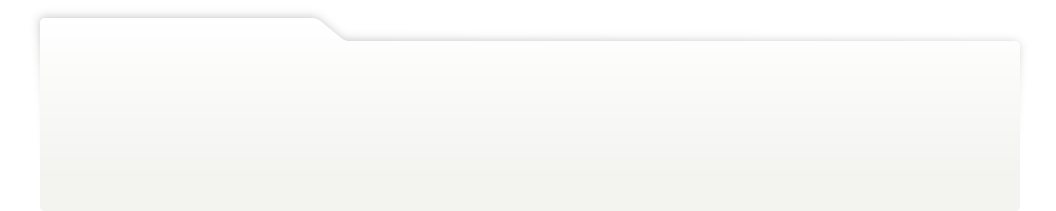
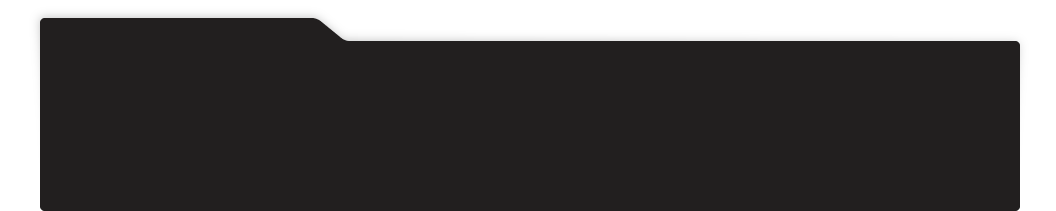
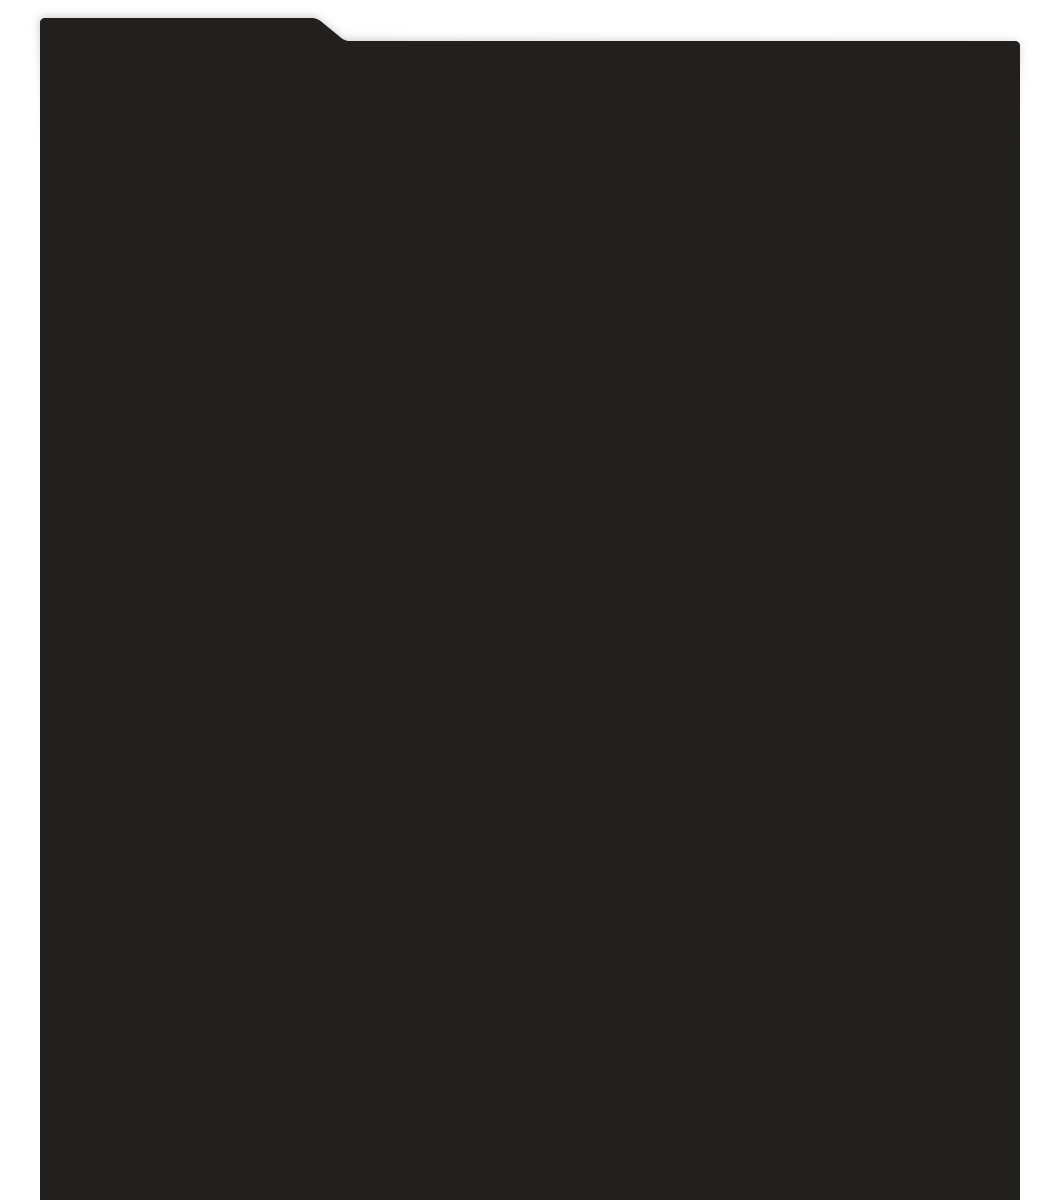
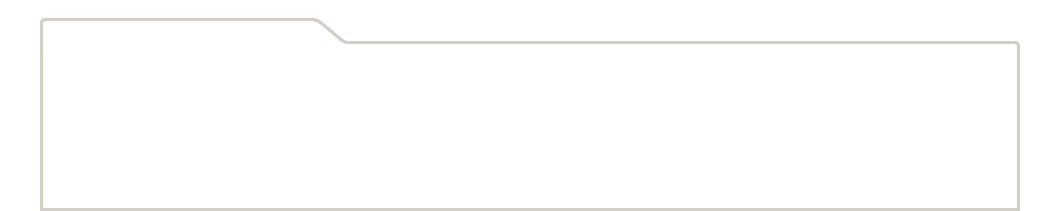
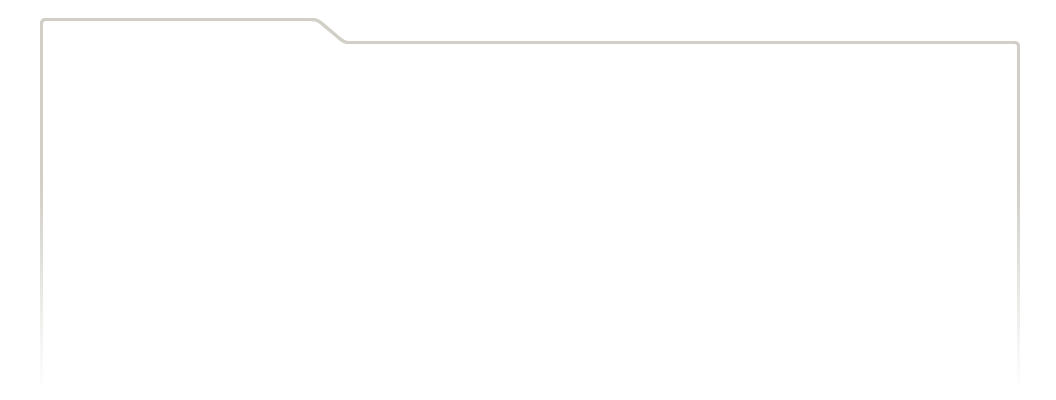
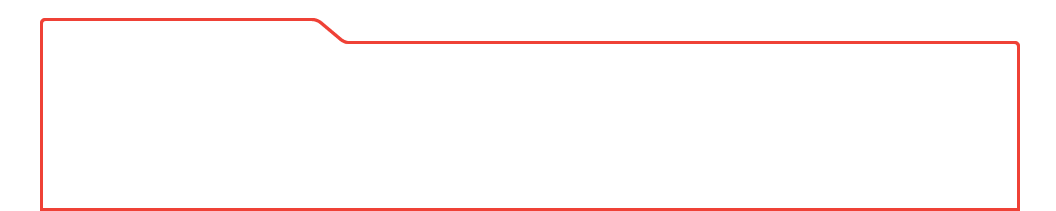
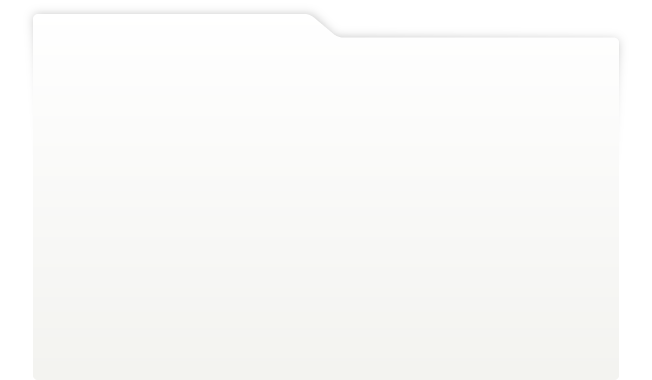
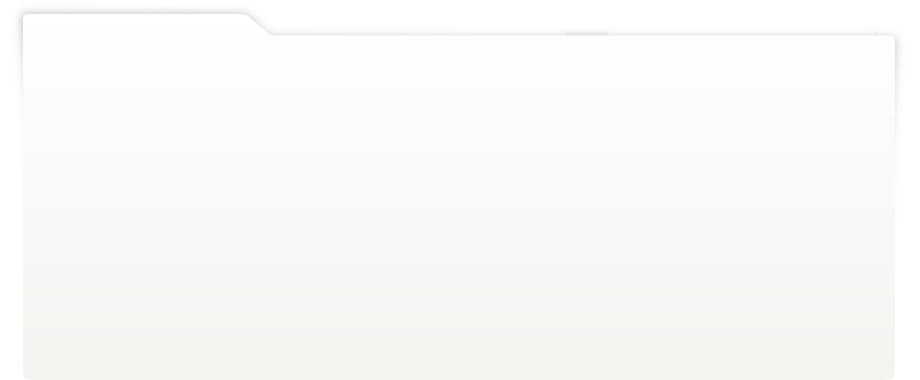
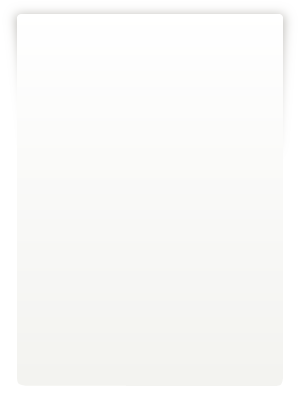
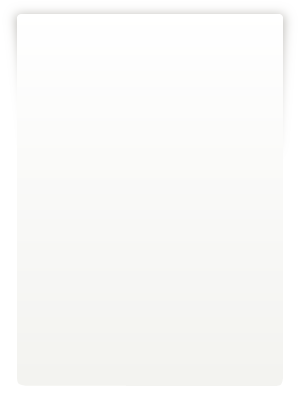
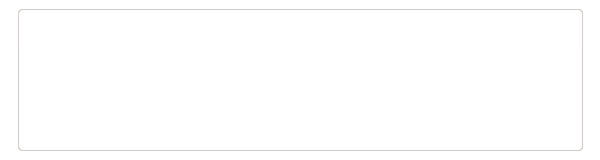
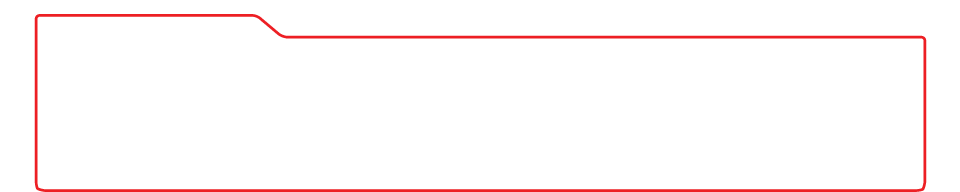
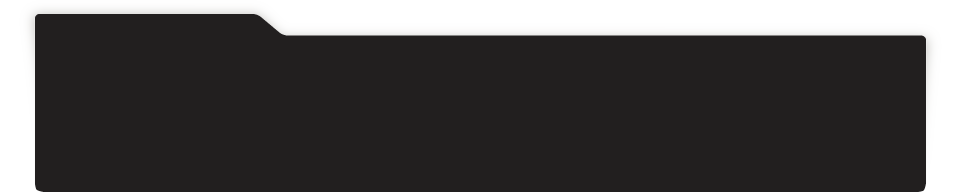
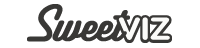
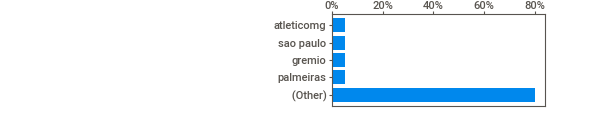
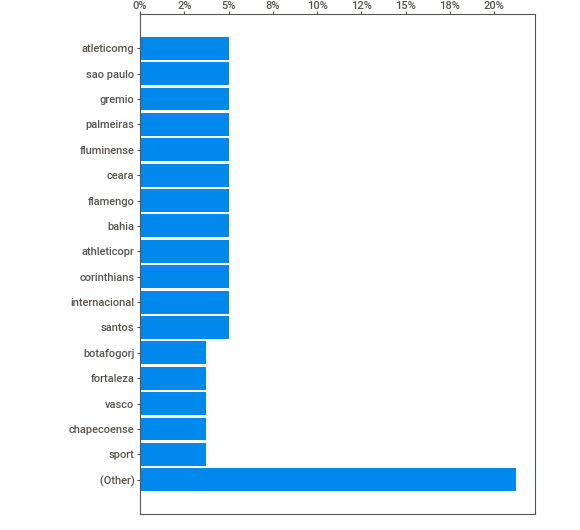
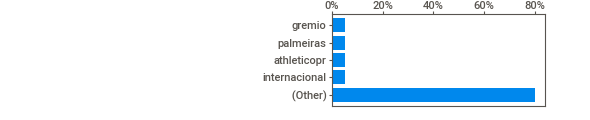
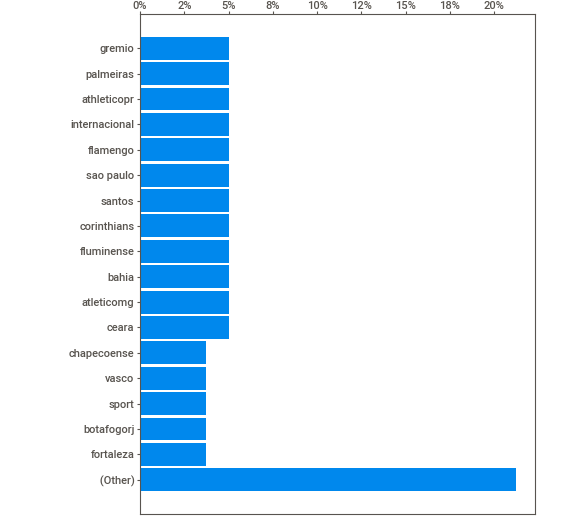
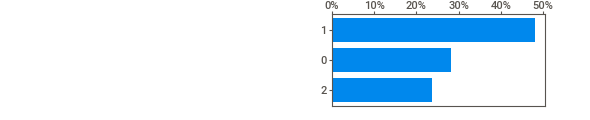
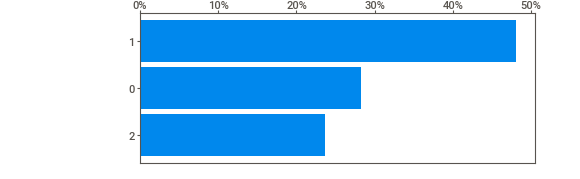
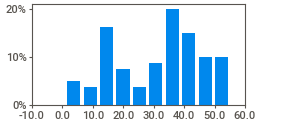
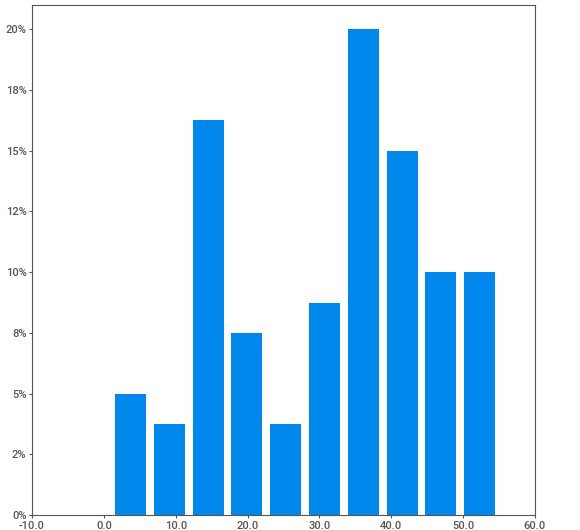
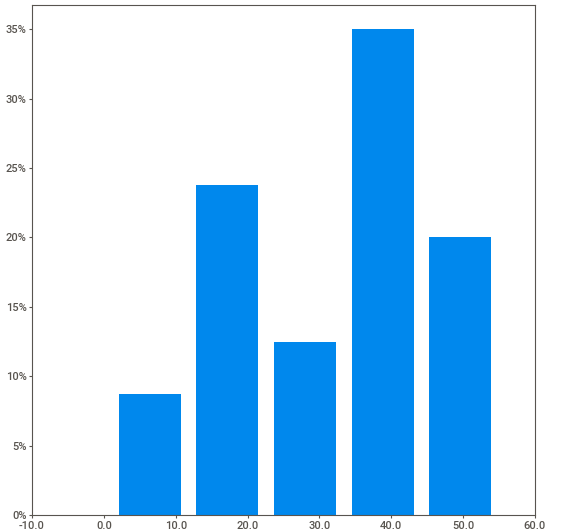
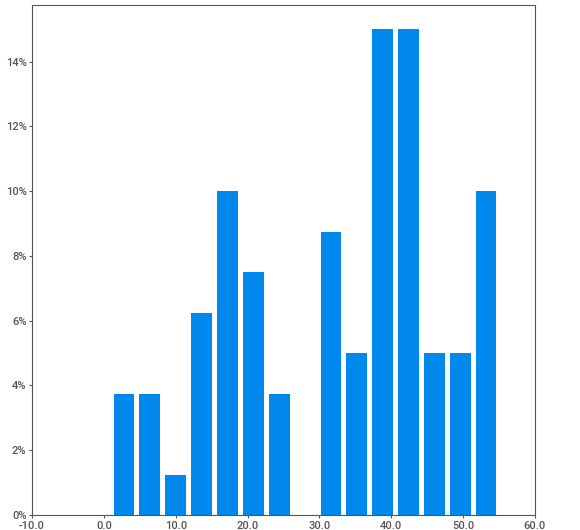
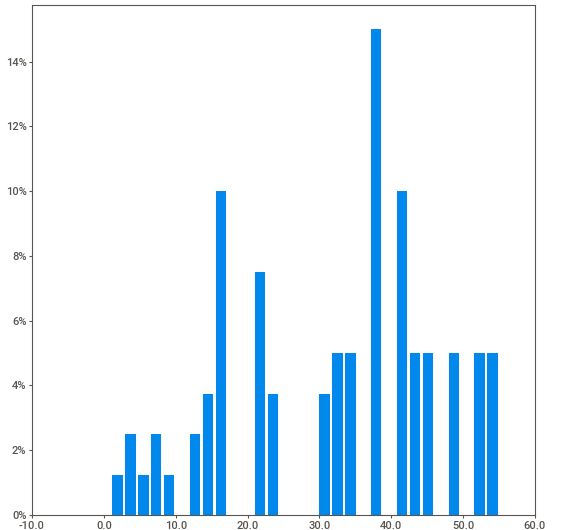
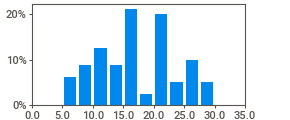
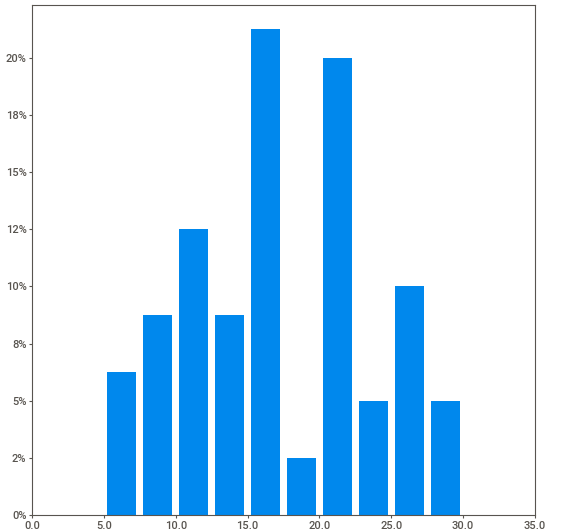
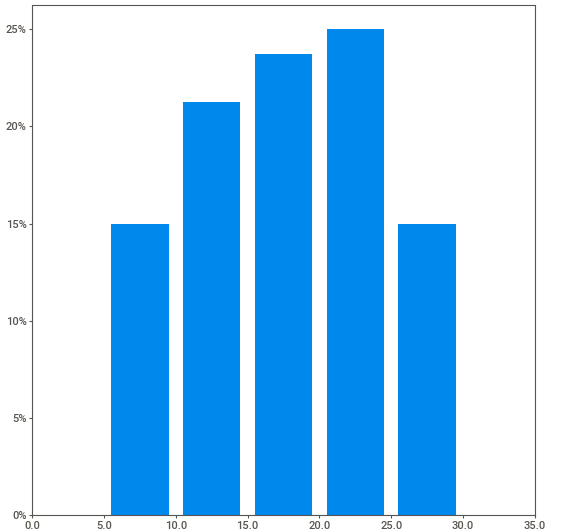
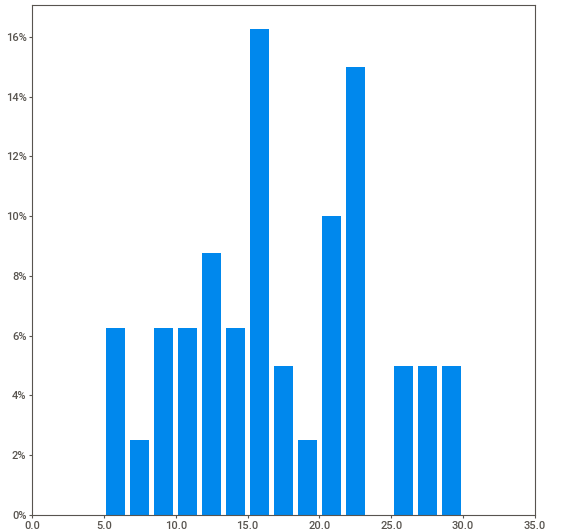
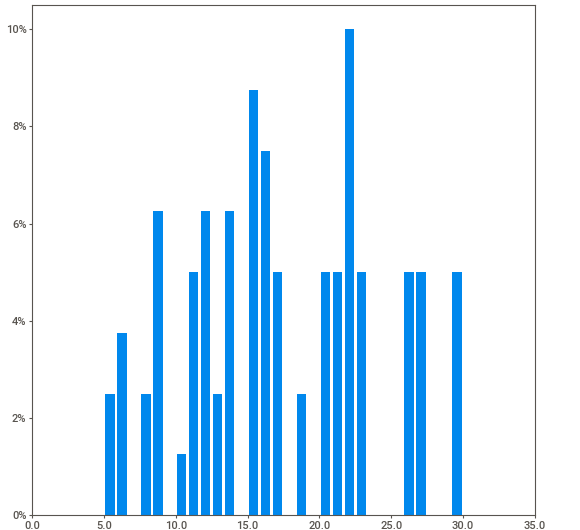
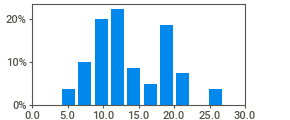
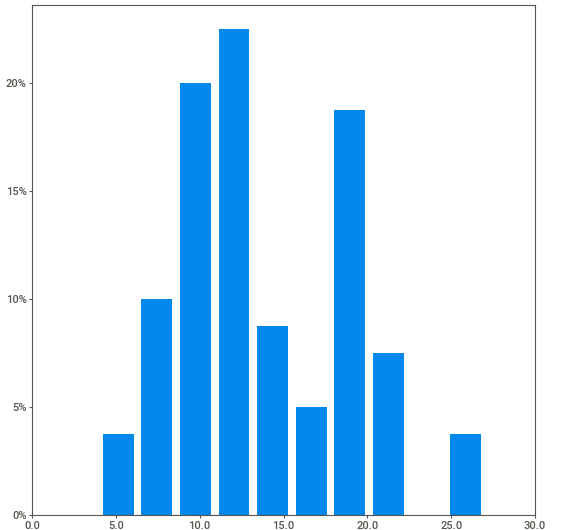
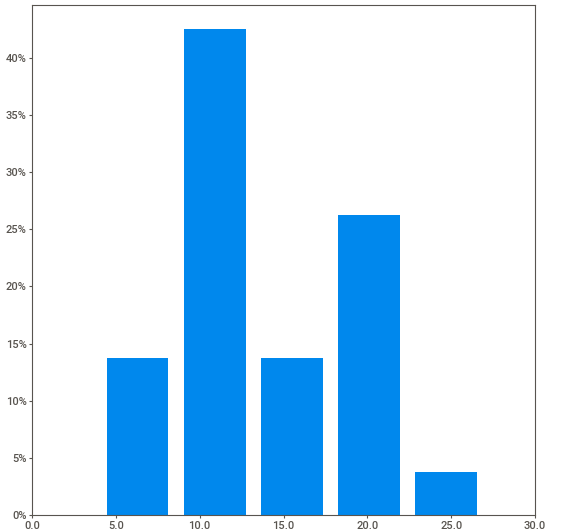
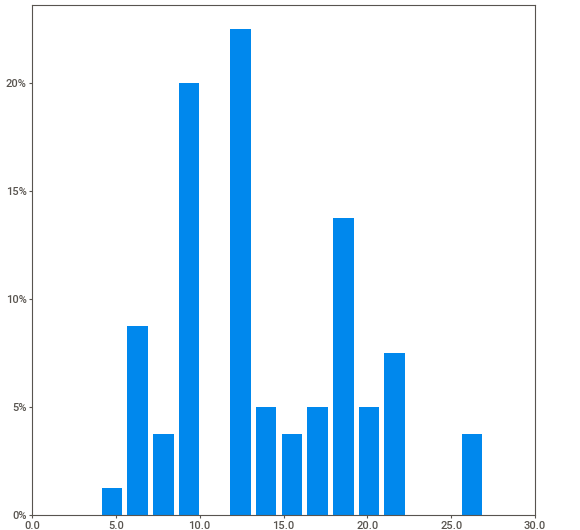
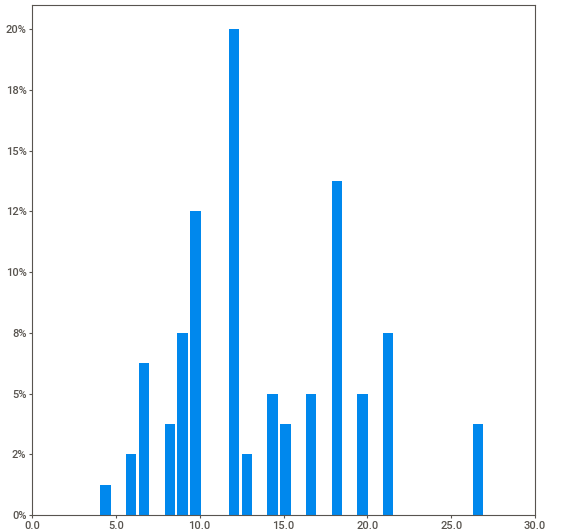
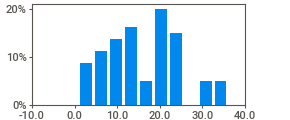
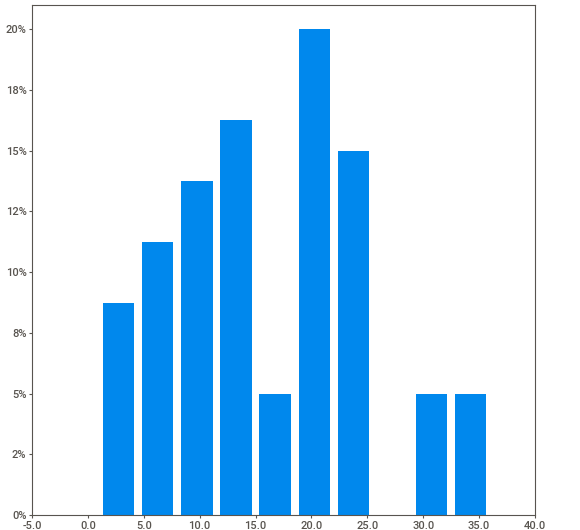
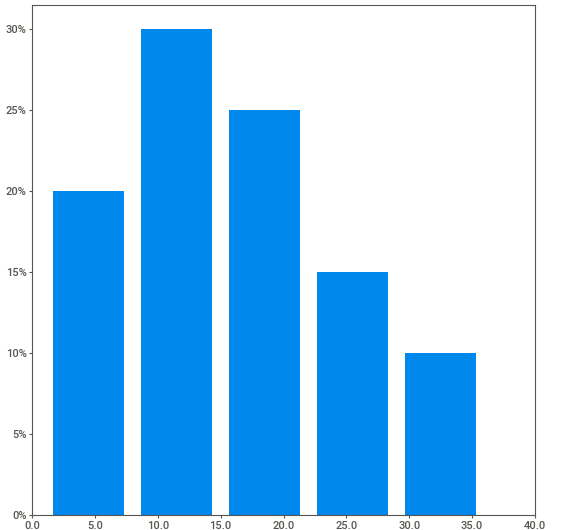
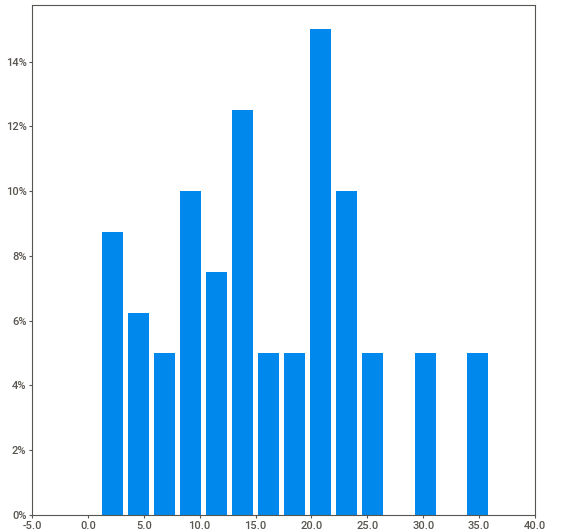
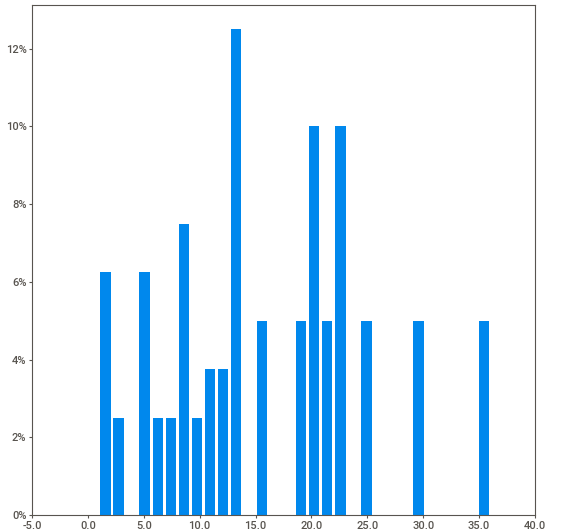
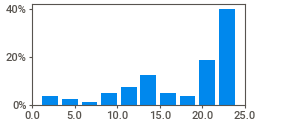
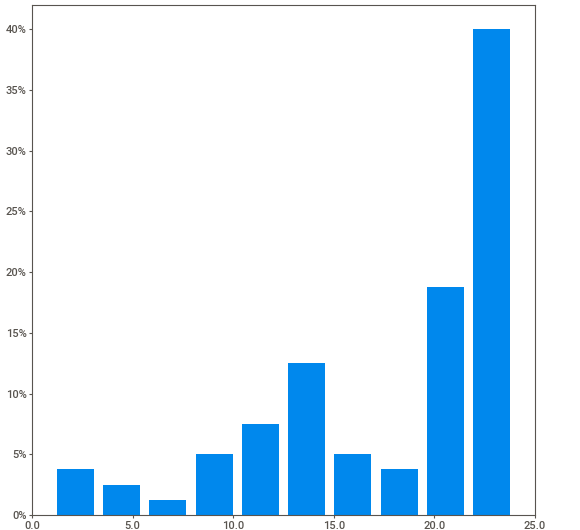
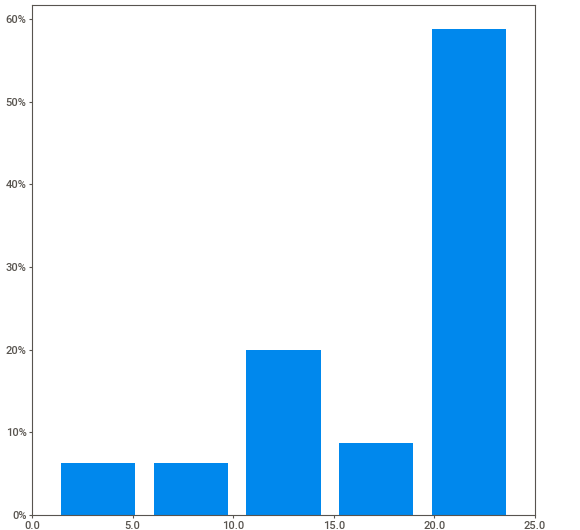
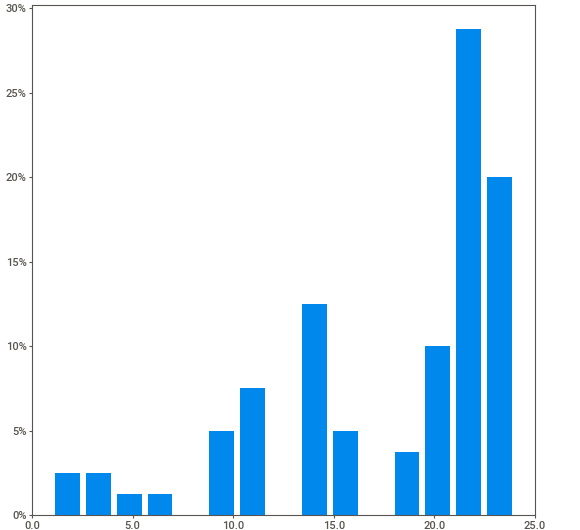
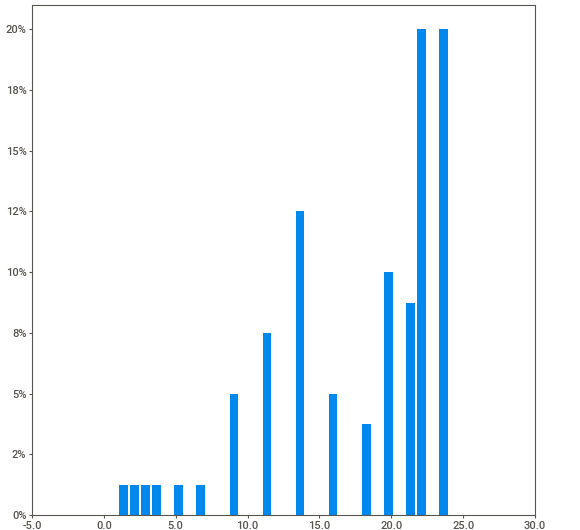
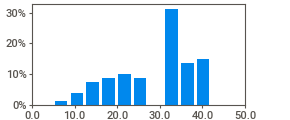
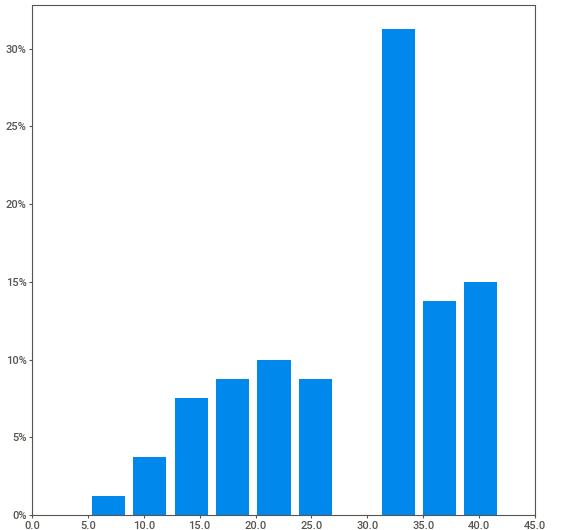
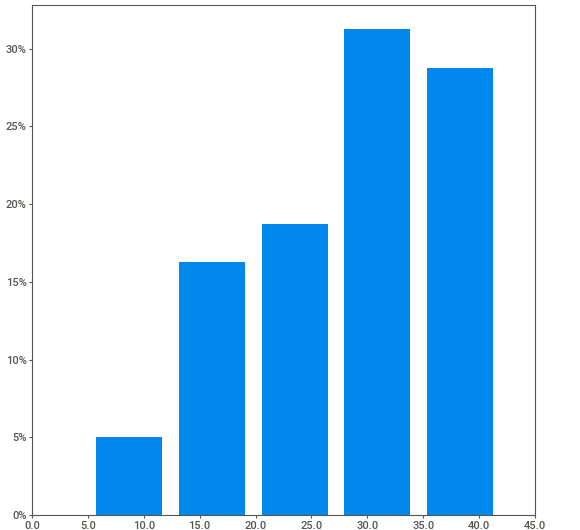
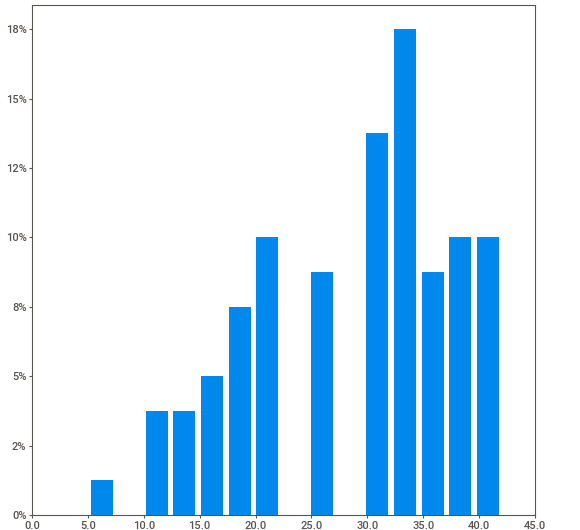
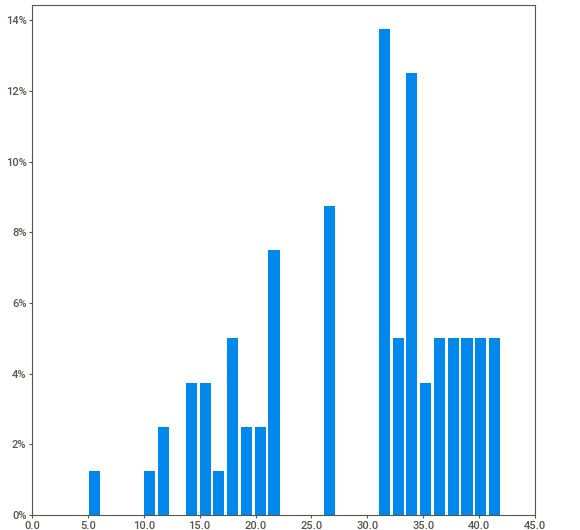
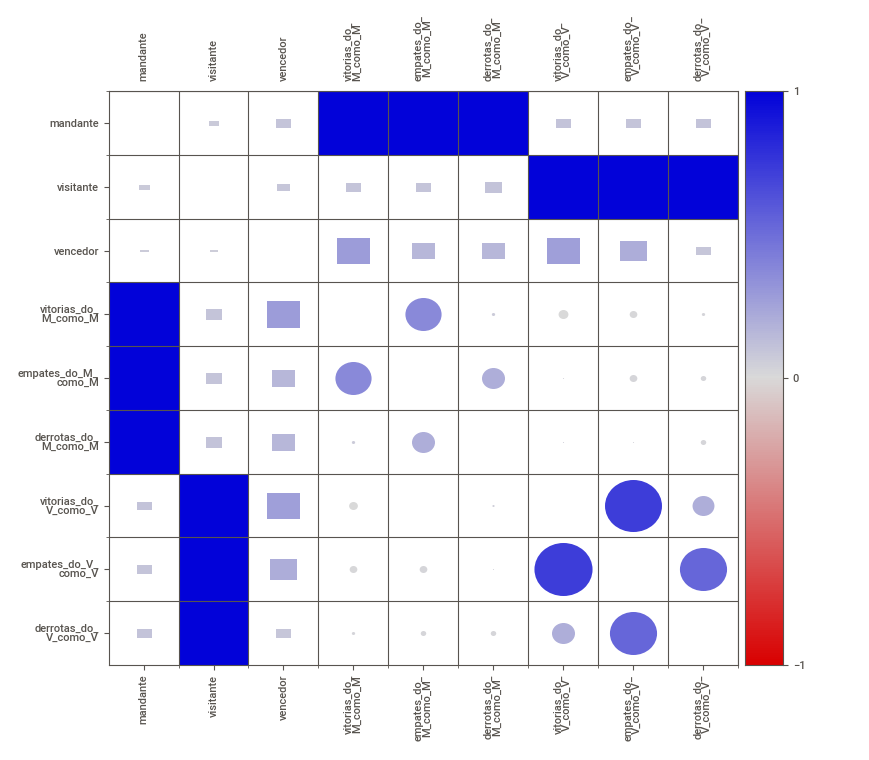
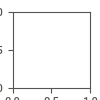

In [212]:
my_report = sv.analyze(dff)
my_report.show_notebook()

In [213]:
tabela=dff['vencedor'].value_counts(True).to_frame()
print('Porcentagem de vitórias de times mandantes/derrotas de times visitantes: {}'.format(tabela['vencedor'][1]))
print('Porcentagem de empates: {}'.format(tabela['vencedor'][0]))
print('Porcentagem de vitorias de times visitantes/derrotas de times mandantes: {}'.format(tabela['vencedor'][2]))

Porcentagem de vitórias de times mandantes/derrotas de times visitantes: 0.48092105263157897
Porcentagem de empates: 0.2822368421052632
Porcentagem de vitorias de times visitantes/derrotas de times mandantes: 0.23684210526315788


Primeiramente ajustamos um DataFrame para ser utilizado, contendo nele nosso Target e todos os Features que julgamos relevantes para o objetivo do projeto.

Após obter as informações da análise, podemos ver que não existem dados faltando. Além disso, podemos perceber que, ao jogar em casa, existe uma maior probabilidade do time vencer e, por consequência, quando o time joga fora de casa, existe uma maior probabilidade do time perder.

Segundo a análise feita a cima concluimos que, as duas features que tem maior correlçãao com o target são: 
- vitorias_do_M_como_M (25%)
- vitorias_do_V_como_V (23%)

Ademais, o número de vitórias do mandante jogando como mandante mais frequente (37) com 15% de frequência é maior que o número de vitórias do visitante jogando como visitante mais frequente (13) com 12.5% de frequência. Além disso, os maiores valores de vitórias do visitante jogando como visitante tem 5% de frequência cada, assim como os valores de vitórias do mandante jogando como mandante, porém, os valores mais altos de vitórias do mandante jogando como mandante são maiores. Portanto, a probabilidade do time ganhar jogando em casa é maior.

Por fim da análise, é possível concluir que as features selecionadas tem relevância para os classificadores, visto que o fato de jogar em casa ou nao influencia no resultado.

## Arrumando as informacoes para classificador

Normaliza o dataframe, separa o target e divide em teste e treino:

In [214]:

dff2=pd.get_dummies(dff)
dff_sem_target=dff2.drop(columns=['vencedor'])
X_train, X_test, y_train, y_test = train_test_split(dff_sem_target, dff['vencedor'], test_size=0.4, random_state=3)

## Classificador Naive-Bayes:

<img src='imagens/nbayes.png'>

Naive, do inglês, ingenuo, é nome de um dos modelos mais populares do aprendizado de máquina. O Naive-Bayes toma como pressuposto que as variáeis do problema são independentes entre si e busca encontrar uma variável a posteriori. 

Um exemplo de Naive-Bayes dentro do tema seria:
- P(A|B) -> probabilidade do time vencer visto que é mandante
- P(A)(probabilidade a priori) -> probabilidade do time vencer
- P(B|A) -> probabilidade do time ser mandante, dado que venceu, 
- P(B) -> probabilidade de ser mandante

O Naive-Bayes utilizado é multinomial, isto é, leva varias features em consideraçao.

In [215]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
results=classification_report(y_test, y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.33      0.19      0.24       167
           1       0.61      0.66      0.63       299
           2       0.36      0.49      0.41       142

    accuracy                           0.49       608
   macro avg       0.43      0.44      0.43       608
weighted avg       0.48      0.49      0.47       608



### Testando Naive-Bayes com as duas features de maior correlação:

Apos fazer a analise exploratoria, foi possivel perceber que as duas features de maior correlaçao com o target eram vitorias_do_M_como_M e vitorias_do_V_como_V, por isso, foi testado um segundo modelo naive bayes apenas com essas duas features

In [216]:
dff_sem_target_duas_features=dff2.drop(columns=['vencedor', 'empates_do_M_como_M', 'derrotas_do_M_como_M', 'empates_do_V_como_V', 'derrotas_do_V_como_V'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(dff_sem_target_duas_features, dff['vencedor'], test_size=0.4, random_state=3)



In [217]:
clf2 = MultinomialNB()
clf2.fit(X_train2, y_train2)
y_pred2=clf2.predict(X_test2)
results=classification_report(y_test2, y_pred2)
print(results)

              precision    recall  f1-score   support

           0       0.31      0.14      0.19       167
           1       0.59      0.69      0.64       299
           2       0.35      0.45      0.39       142

    accuracy                           0.48       608
   macro avg       0.41      0.43      0.41       608
weighted avg       0.46      0.48      0.46       608



## Regressão logística:

<img src='imagens/reglog.jpeg'>

A regressão logística é um modelo estatístico usado para determinar a probabilidade de um evento acontecer, mostra a relação entre os recursos e, em seguida, calcula a probabilidade de um determinado resultado.

Ao usarmos este modelo assumimos que:
- Apenas as variáveis que são significativas devem ser incluídas.
- As variáveis independentes devem ser essencialmente independentes umas das outras. Deve haver pouca ou nenhuma multi-colinearidade.

Neste caso foi utilizada a regressão logística multinomial, onde as variáveis de resposta podem incluir mais de duas variáveis, que não estarão em nenhuma ordem. Um exemplo é prevo resultado de um partida para um time mandante será: vitória, empate ou derrota.

In [218]:
Y=dff['vencedor']
X=dff_sem_target

In [219]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [220]:
results = regress(Y,X)
results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               vencedor   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.472
Date:                Tue, 07 Jun 2022   Prob (F-statistic):             0.0142
Time:                        22:43:49   Log-Likelihood:                -1613.8
No. Observations:                1520   AIC:                             3342.
Df Residuals:                    1463   BIC:                             3645.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5884      0.069      8.501      0.000       0.453       0.724
vitorias_do_M_como_M        0.0011      0.001      0.763      0.446      -0.002       0.004
empates_do_M_como_M        -0.0130      0.003     -4.160      0.000      -0.019      -0.007
derrotas_do_M_como_M        0.0242      0.003      6.926      0.000       0.017       0.031
vitorias_do_V_como_V        0.0190      0.003      5.628      0.000       0.012       0.026
empates_do_V_como_V        -0.0189      0.006     -3.166      0.002      -0.031      -0.007
derrotas_do_V_como_V        0.0089      0.003      3.299      0.001       0.004       0.014
mandante_americamg          0.0198      0.114      0.175      0.861      -0.203       0.243
mandante_athleticopr       -0.0550      0.078     -0.707      0.480      -0.208       0.098
mandante_atleticogo        -0.0618      0.105     -0.586      0.558      -0.268       0.145
mandante_atleticomg         0.0038      0.073      0.052      0.958      -0.139       0.146
mandante_avai               0.0944      0.153      0.619      0.536      -0.205       0.394
mandante_bahia             -0.0737      0.078     -0.940      0.347      -0.228       0.080
mandante_botafogorj        -0.0414      0.088     -0.470      0.638      -0.214       0.131
mandante_bragantino        -0.0112      0.113     -0.099      0.921      -0.232       0.210
mandante_ceara             -0.0526      0.077     -0.682      0.495      -0.204       0.099
mandante_chapecoense       -0.0784      0.076     -1.028      0.304      -0.228       0.071
mandante_corinthians        0.0111      0.076      0.145      0.884      -0.139       0.161
mandante_coritiba           0.1806      0.154      1.175      0.240      -0.121       0.482
mandante_cruzeiro           0.0311      0.114      0.272      0.786      -0.193       0.256
mandante_csa                0.2169      0.154      1.413      0.158      -0.084       0.518
mandante_cuiaba             0.1036      0.154      0.674      0.501      -0.198       0.405
mandante_flamengo           0.0097      0.070      0.139      0.889      -0.127       0.147
mandante_fluminense        -0.0357      0.079     -0.451      0.652      -0.191       0.120
mandante_fortaleza          0.0009      0.092      0.009      0.992      -0.179       0.181
mandante_goias              0.0834      0.112      0.745      0.457      -0.136       0.303
mandante_gremio            -0.0126      0.079     -0.159      0.874      -0.168       0.143
mandante_internacional      0.0300      0.077      0.387      0.699      -0.122       0.182
mandante_juventude          0.0525      0.151      0.347      0.729      -0.244       0.349
mandante_palmeiras          0.0308      0.076      0.402      0.687      -0.119       0.181
mandante_parana            -0.0271      0.152  

In [221]:
regressao_log = LogisticRegression()
log_reg = regressao_log.fit(X_train, y_train)
pred_y=log_reg.predict(X_test)
dados_reg = classification_report(y_test, pred_y)
print(dados_reg)

              precision    recall  f1-score   support

           0       0.29      0.23      0.26       167
           1       0.55      0.70      0.61       299
           2       0.33      0.23      0.27       142

    accuracy                           0.46       608
   macro avg       0.39      0.38      0.38       608
weighted avg       0.43      0.46      0.43       608



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Floresta Aleatória:

<img src='imagens/ar.jpeg'>

Traduzindo, Random Forest significa floresta aleatória. Este nome explica muito bem o funcionamento do algoritmo, que irá criar muitas árvores de decisão, de maneira aleatória, formando uma "floresta", onde cada árvore será utilizada na escolha do resultado final.<br>

Árvores de decisão são algoritmos de machine learning muito utilizados, com uma estrutura simples de compreender e que costumam apresentar bons resultados em suas previsões. Como o nome sugere, neste algoritmo vários pontos de decisão serão criados. Estes pontos são os "nós" da árvore e em cada um deles o resultado da decisão será seguir por uramoho, ou por outro. Os caminhos existentes são os "ramos". Os nós são responsáveis pelas verificações que irão indicar um ramo ou outro para seguir o fluxo. <br>

Voltando a floresta aleatória, a "floresta" criada é uma combinação de árvores de decisão, na maioria dos casos treinados com o método de bagging, que tem como principal ideia a combinação dos modelos de aprendizado para aumentar o resultado geral.

In [222]:
classifica_floresta= RandomForestClassifier(n_estimators=1500, n_jobs=-1)
classifica_floresta.fit(X_train, y_train)
y_pred2= classifica_floresta.predict(X_test)
analise_d_floresta=classification_report(y_test, y_pred2)
print(analise_d_floresta)



              precision    recall  f1-score   support

           0       0.35      0.34      0.34       167
           1       0.57      0.64      0.60       299
           2       0.39      0.30      0.33       142

    accuracy                           0.48       608
   macro avg       0.43      0.42      0.43       608
weighted avg       0.47      0.48      0.47       608



## Resultado dos modelos:

In [223]:
print('Score Naive Bayes: {:.2f}'.format(clf.score(X_test, y_test)))
print('Score Naive Bayes com duas features: {:.2f}'.format(clf2.score(X_test2, y_test2)))
print('Score Regressão Logística: {:.2f}'.format(regressao_log.score(X_test, y_test)))
print('Score Random forest: {:.2f}'.format(classifica_floresta.score(X_test, y_test)))

Score Naive Bayes: 0.49
Score Naive Bayes com duas features: 0.48
Score Regressão Logística: 0.46
Score Random forest: 0.48


## Conclusão

O melhor classificador dos três utiliados foi o Naive-Bayes, contudo, mesmo o com melhor desempenho, sua acuracia não foi relativamente alta (49% de acerto). Mesmo assim, como foram utiliado 3 targets (empate, vitória e derrota), o modelo tem melhor desempenho que uma escolha aleatória (33%). <br>
Possivelmente, o baixo desempenho pode estar ligado ao fato de que, muitas vezes, o futebol é imprevisível. E isso que torna o esporte tão emocionante. Por mais que ciência de dados seja muitas vezes essencial para prever respostas, o comportamento humano é muitas vezes pouco previsível. <br>
Fatores como, quantidade de torcida, escalação, formação do time muitas vezes influencia no desempenho da equipe. Além disso, campeonatos como o Brasileirão tem partidas todas semanas e, possivelmente, o desempenho de uma partida mais "próxima" influencia mais do que uma partida que aconteceu a mais tempo, tornando a previsão mais complexa.


<img src='imagens/neto.webp'>